# Tonality in language and sensitivity to pitch

**Author:** Éloïse Delerue

**Laboratory:** Université Paris Sciences & Lettres

**Contact:** eloise.delerue@psl.eu

**Date:** January 17th, 2025

## 1. Introduction

Tonal languages, such as Mandarin or Vietnamese, use pitch as a phonemic distinction (a change in pitch can change the meaning of a word), as opposed to non-tonal languages, such as French or English, for which pitch does not differentiate words. Since tonal language native speakers are accustomed to using pitch to convey different meanings, we can suppose that they might develop heightened sensitivity to pitch variations. This sensitivity could extend beyond language to other auditory domains, such as music (Deutsch et al., 2006).

**Does speaking a tonal language allow for better distinction of musical notes?**

*We anticipate that if this is the case, we should observe:*
- ***Prediction 1:*** *Native speakers of tonal languages ​​should be more accurate at discriminating notes.*
- ***Prediction 2:*** *Native speakers of tonal languages should be faster at discriminating notes.*

## 2. Library Import

First, we will import the required libraries for the analysis.

In [21]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf

## 3. Data Import

An experiment was designed using PsychoPy and hosted on Pavlovia before being shared on Prolific. A total of 59 participants took part in the study. The experiment involved listening to twenty pairs of musical notes and determining whether they could be distinguished from one another. It recorded both the accuracy of the responses and the reaction times. Additionally, participants were asked to report their native language(s).

Let us load the data.

In [22]:
# Loading the data
df = pd.read_csv("data.csv", sep = ",")
display(df)

,participant,language,musical_practice,key_resp.corr,key_resp.rt,trials,audio1,audio2,Age,Sex,Language
0,58bfee7de5869400018f5e9e,french english,y,1,7.9273,14,stimuli/E4.wav,stimuli/B4.wav,38,Male,French
1,58bfee7de5869400018f5e9e,french english,y,1,6.3274,16,stimuli/G4.wav,stimuli/A4.wav,38,Male,French
2,58bfee7de5869400018f5e9e,french english,y,1,6.8880,12,stimuli/A4.wav,stimuli/D4.wav,38,Male,French
3,58bfee7de5869400018f5e9e,french english,y,1,4.5192,6,stimuli/G4.wav,stimuli/G4.wav,38,Male,French
4,58bfee7de5869400018f5e9e,french english,y,1,4.2141,15,stimuli/Eb4.wav,stimuli/Bb4.wav,38,Male,French
...,...,...,...,...,...,...,...,...,...,...,...
1019,67643657ac8d6c44d51d158c,French,y,1,4.3993,3,stimuli/Eb4.wav,stimuli/Eb4.wav,29,Male,French
1020,67643657ac8d6c44d51d158c,French,y,1,4.4878,9,stimuli/B4.wav,stimuli/B4.wav,29,Male,French
1021,67643657ac8d6c44d51d158c,French,y,1,4.3851,11,stimuli/C4.wav,stimuli/Ab4.wav,29,Male,French
1022,67643657ac8d6c44d51d158c,French,y,1,5.2492,19,stimuli/Eb4.wav,stimuli/E4.wav,29,Male,French


## 4. Data Manipulation

We will first check the participants' responses on their native language(s).

In [23]:
# Looking at the participants' languages
counts = df['language'].value_counts()
print(counts)

language
French                       540
french                       204
english                       40
French English                20
English                       20
spanish                       20
french english                20
Français                      20
FRENCH                        20
Mandrain                      20
ENGLISH                       20
Mandarin                      20
FRENCH, ENGLISH               20
mandarin                      20
French and Haitian Creole     20
Name: count, dtype: int64


We can see that there are typing errors, and that the answers are not standardised. Let us fix that.

In [24]:
# Defining a function that lowers text characters
def convert_to_lowercase(text):
    return text.lower()

In [25]:
# Applying the covert_to_lowercase function to the dataframe
df['language'] = df['language'].apply(convert_to_lowercase)

In [26]:
# Defining a function that replaces some words with others
def replace_language(text):
    text = text.replace("mandrain", "mandarin")
    text = text.replace("français", "french")
    text = text.replace("french english", "french, english")
    text = text.replace("french and haitian creole", "french, haitian creole")
    return text

In [27]:
# Applying the replace_language function to the dataframe
df['language'] = df['language'].apply(replace_language)

In [28]:
# Verifying that everything is correct
counts = df['language'].value_counts()
print(counts)

language
french                    784
english                    80
french, english            60
mandarin                   60
spanish                    20
french, haitian creole     20
Name: count, dtype: int64


Now, we will separate the tonal languages from the non-tonal languages. Please note that the only tonal language here is Mandarin.

In [29]:
# Splitting the languages into "tonal" and "non tonal"
df['language_type'] = df['language'].apply(lambda x: 'tonal' if x == 'mandarin' else 'non tonal')

In [30]:
# Verifying that everything is correct
counts = df['language_type'].value_counts()
print(counts)

language_type
non tonal    964
tonal         60
Name: count, dtype: int64


Let us get back to our question and look at the variables involved.

In [31]:
# Grouping by "participant" and calculating the sum and count of the answers
speed = df.groupby('participant')['key_resp.rt'].agg(['sum', 'count'])

# Calculating the mean speed of each participant
speed['speed_score'] = speed['sum'] / speed['count']

# Adding the data to our dataset
merged_table = pd.merge(df, speed, on='participant', how='right')

In [32]:
# Grouping by "participant" and calculating the sum and count of the answers
accuracy = df.groupby('participant')['key_resp.corr'].agg(['sum', 'count'])

# Calculating the mean accuracy of each participant
accuracy['accuracy_score'] = accuracy['sum'] / accuracy['count']

# Adding the data to our dataset
merged_table = pd.merge(merged_table, accuracy, on='participant', how='right')

In [33]:
# Dropping unnecessary columns
merged_table = merged_table.drop('count_x', axis=1)
merged_table = merged_table.drop('count_y', axis=1)
merged_table = merged_table.drop('sum_x', axis=1)
merged_table = merged_table.drop('sum_y', axis=1)

In [34]:
# Keeping only one line per participant
df_analysis = merged_table.drop_duplicates(subset='participant', keep='first')

We have now added to dataset the "accuracy score" and the "speed score" of the participants.

In [35]:
# Printing the new dataset
display(df_analysis)

,participant,language,musical_practice,key_resp.corr,key_resp.rt,trials,audio1,audio2,Age,Sex,Language,language_type,speed_score,accuracy_score
0,58bfee7de5869400018f5e9e,"french, english",y,1,7.9273,14,stimuli/E4.wav,stimuli/B4.wav,38,Male,French,non tonal,4.573920,1.0
20,5c75c0b13348af0001919592,french,n,1,4.3420,4,stimuli/C5.wav,stimuli/Eb4.wav,30,Female,French,non tonal,4.361000,1.0
40,5d28a3187d6ad00001a33280,french,n,1,5.2080,5,stimuli/C4.wav,stimuli/F4.wav,34,Male,French,non tonal,5.340850,1.0
60,5d66b4f503b0d900195ca627,french,n,1,4.2947,15,stimuli/Eb4.wav,stimuli/Bb4.wav,59,Male,French,non tonal,4.297385,1.0
80,5d726b8a0c3f0f0017cdfcf7,french,n,1,4.1504,14,stimuli/E4.wav,stimuli/B4.wav,34,Male,French,non tonal,4.070815,1.0
100,5e11434b01423f81a3ff9846,french,n,1,4.6370,18,stimuli/C5.wav,stimuli/C5.wav,38,Male,French,non tonal,4.361000,1.0
120,5e15aae07bf572b8f97a847d,french,n,1,5.1856,16,stimuli/G4.wav,stimuli/A4.wav,30,Male,French,non tonal,4.465520,1.0
140,5e2c96a6ec357b2b16b15d31,"french, english",y,1,17.6870,5,stimuli/C4.wav,stimuli/F4.wav,66,Female,French,non tonal,4.934700,1.0
160,5e34ff524bf4624c3fcb4b54,french,n,1,4.7005,16,stimuli/G4.wav,stimuli/A4.wav,33,Female,French,non tonal,4.821105,1.0
180,5ed7fdd9e785b62db5350997,english,n,1,4.4842,3,stimuli/Eb4.wav,stimuli/Eb4.wav,23,Female,French,non tonal,4.428635,1.0


## 5. Data Description

In this section, we will represent the variables involved in the analysis.

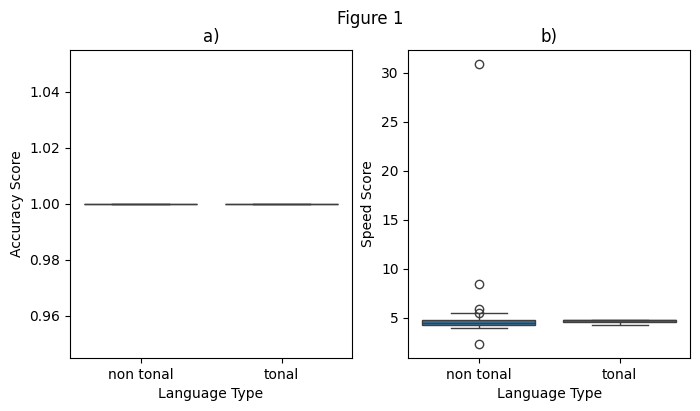

In [36]:
# Creating a panel
fig1 = plt.figure(figsize = (8, 4))
fig1.suptitle("Figure 1")
plt.tight_layout()

# Figure 1.a: Boxplot of the accuracy score depending on the type of language
plt.subplot(1, 2, 1) 
sns.boxplot(x = df_analysis['language_type'], y = df_analysis['accuracy_score'])
plt.gca().set_xlabel("Language Type")
plt.gca().set_ylabel("Accuracy Score")
plt.title("a)")

# Figure 1.b: Boxplot of the speed score depending on the type of language
plt.subplot(1, 2, 2) 
sns.boxplot(x = df_analysis['language_type'], y = df_analysis['speed_score'])
plt.gca().set_xlabel("Language Type")
plt.gca().set_ylabel("Speed Score")
plt.title("b)")

# Saving the jpg and showing it
plt.savefig('linguistics_fig_1.jpg') 
plt.show()

Let us print the accuracy score and speed score means for tonal and non-tonal languages.

In [37]:
# Printing the mean value of the accuracy score for each language type
print("Mean accuracy score:")
print(df_analysis.groupby('language_type')['accuracy_score'].mean())

Mean accuracy score:
language_type
non tonal    1.0
tonal        1.0
Name: accuracy_score, dtype: float64


In [38]:
# Printing the mean value of the speed score for each language type
print("Mean speed score:")
print(df_analysis.groupby('language_type')['speed_score'].mean())

Mean speed score:
language_type
non tonal    5.127122
tonal        4.571228
Name: speed_score, dtype: float64


## 6. Data Modelling

Still, we need to see if this is actually significant. To do so, we will perform a T-test.

Please note that both means are the same for the accuracy score, since all participants answered correctly. Therefore, we cannot perform a T-test for the accuracy score.

In [39]:
# T-test of the difference of speed scores depending on the language type
speed_tonal = df_analysis[df_analysis['language_type'] == 'tonal']['speed_score'].dropna()
speed_non_tonal = df_analysis[df_analysis['language_type'] == 'non tonal']['speed_score'].dropna()

t_statistic, p_value = stats.ttest_ind(speed_tonal, speed_non_tonal)

print(f"t-stat: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

t-stat: -0.2460
p-value: 0.8067


## 7. Results

Native speakers of tonal languages as well as native speakers of non-tonal languages answered all questions correctly ($\mu_1 = 1$, $\mu_2 = 1$, see **Figure 1**). As for their speed, it is slightly different ($\mu_1 = 5.127122$, $\mu_2 = 4.571228$, see **Figure 1**); however, this difference is not significant ($t = -0.2460$, $p = 0.8067$).

## 8. Conclusion

Our results are not significant enough to conclude whether the native language(s) has an influence on the discrimination of musical notes. Thus we **cannot confirm our prediction 2**. However, everyone was able to pass the test without any mistakes, which **contradicts our prediction 1**.

It should be noted that out of 59 participants, only 3 spoke a tonal language, which was Mandarin. This is a very unbalanced ratio and a very small sample. The study could therefore be repeated with more participants. The study could also be redone with a more subtle difference between the notes: for example quarter tones, which are not generally used in Western music, and to which people are generally less accustomed.

## 9. References

DEUTSCH, HENTHORN, MARVIN, XU, « Absolute pitch among American and Chinese 
conservatory students: Prevalence differences, and evidence for a speech-related critical period. », 
J. Acoust. Soc. Am. 1 February 2006; 119 (2): 719–722.).